# Esonero 2 - 17 Maggio 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice descrivendo le operazioni effettuate


# Esercizio 1

Data la seguente immagine, costruire la feature pyramid di gaussiane e descrivere il procedimento

![](figure1.jpg)

In [ ]:
from utils import *
import numpy.linalg as LA
from PIL import Image

imageFull= Image.open('figure1.jpg')

image = rgb2gray(imageFull)

maxv, minv = np.max(image), np.min(image)

image = (image - minv)/(maxv-minv)

print('Shape', image.shape)
img_show(image,cmap=cm.gray)

#scale-space
fig = plt.figure(figsize=(20, 20))

num_octave = 6

for i in range(num_octave):
    sigma = 2**(i-1)
    fig.add_subplot(1, num_octave, i+1) 
    plt.imshow(ndimage.gaussian_filter(image,sigma),cmap=cm.gray)
    s = 2*np.ceil(3*sigma)+1
    plt.title(f'$\sigma$: {sigma} (filter size: {s})')
    plt.axis('off')

plt.show()

rows,cols = image.shape

output = np.zeros((rows,cols+cols//2))

output[:rows,:cols] = image

num_octave = 6

cur_scale = image

horiz = True
rows = 0

for i in range(num_octave):
    sigma = 2**i
    cur_scale = ndimage.gaussian_filter(image,sigma)
    cur_scale = cur_scale[::2**(i+1),::2**(i+1)]
    rows_scaled, cols_scaled = cur_scale.shape
    output[rows:rows+rows_scaled,cols:cols+cols_scaled] = cur_scale
    rows += rows_scaled
        
        
plt.figure(figsize=(20, 20))

plt.imshow(output,cmap=cm.gray)
plt.axis('off')
plt.show()

sz = 4

num_octave = 6

cur_scale = np.copy(image)
sigma = 1

for i in range(num_octave):
    cur_scale = ndimage.gaussian_filter(cur_scale,sigma)
    cur_scale = cur_scale[::2,::2]
    
    plt.figure(figsize=(sz, sz))
    plt.imshow(cur_scale,cmap=cm.gray)
    s = 2*np.ceil(3*2**(i-1))+1
    plt.title(f'$\sigma$: {2**(i-1)} - Size: {cur_scale.shape}')
    plt.axis('off')
    plt.show()
    
    sz = sz/2


# Esercizio 2


Data la seguente sequenza di tensori e la funzione *f*, calcolare il gradiente per i tensori a,b,c,d,e,y. 

Descrivere come viene costruito il grafo di computazione mostrando quali operazioni vengono effettuate, cioè calcolando le derivate parziali in maniera esplicita. 

$
y = f(a,b,c,d,e) = \sum \frac {a^2 + \exp(b^2) * \sin (c*d)} {3e + 1}
$

*non sono necessarie librerie esterne*

In [ ]:
a = torch.tensor([5, 6, 7, 8, 1, 2], dtype=torch.float, requires_grad=True).view(3, 2)
b = torch.tensor([3, 3, 0, 1, 6, 2], dtype=torch.float, requires_grad=True).view(3, 2)
c = torch.tensor([1, 5, 0, 7, 4, 3], dtype=torch.float, requires_grad=True).view(3, 2)
d = torch.tensor([2, 6, 3, 8, 3, 1], dtype=torch.float, requires_grad=True).view(3, 2)
e = torch.tensor([5, 2, 1, 1, 1, 1], dtype=torch.float, requires_grad=True).view(3, 2)



# Esercizio 3

Dati due batch A e B, mostrare gli effetti della BN.

Suggerimento: calcolare gli istogrammi di A e B

# Esercizio 4

Dato il seguente frammento di codice

In [ ]:
conv1 = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2)
conv2 = torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

model = lambda x: conv2(conv1(x))

Indicare giustificando la risposta qual'è il risultato per un'immagine 1x3x400x400 illustrandolo con un esempio. 

In [ ]:
#cambia la dimensione

conv1 = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2)
conv2 = torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

model = lambda x: conv2(conv1(x))

x = torch.rand(1,3,400,400)
output=model(x)
output.shape

torch.Size([1, 30, 66, 50])

# Esercizio 5

Adattare/semplificare la rete VGG affinché gestisca un input di immagini 400x400

# Esercizio 6

Data la seguente immagine, calcolare la IoU tra i due box mostrati in figura. 
Descrivere tutte le operazioni effettuate

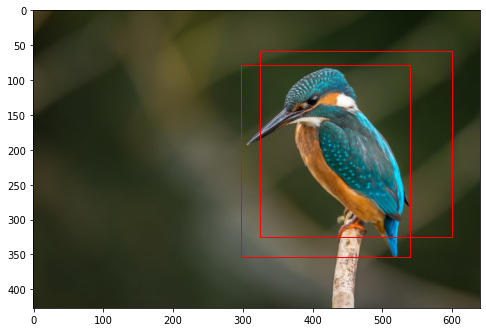

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
import matplotlib.patches as patches

def plot_bbox(image_np, bbox_list):
    fig, ax = plt.subplots(1)
    fig.set_size_inches(8, 8)

    ax.imshow(image_np)

    for bbox_idx in range(bbox_list.shape[0]):
        x1, y1, x2, y2 = bbox_list[bbox_idx, :].tolist()

        w = x2 - x1
        h = y2 - y1

        rect = patches.Rectangle((x1, y1), w, h,
                                 linewidth=1, 
                                 edgecolor='r', 
                                 facecolor='none')

        ax.add_patch(rect)

    plt.show();

imageBB1 = mp_image.imread('figure2.jpg')

bb1 = [297, 79, 540, 354]
bb2 = [325, 59, 600, 325]

plot_bbox(imageBB1, np.array([bb1, bb2]))